In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [28]:

# Load from csv and subset the columns & drop nans
df_train = pd.read_csv('train.csv')
vars_list = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_train = df_train[vars_list].dropna()
display(df_train.head())
df_train.info()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [29]:
# Encode the sex & embarked variables
enc = OrdinalEncoder()
df_train[['Sex', 'Embarked']] = enc.fit_transform(df_train[['Sex', 'Embarked']])
display(df_train.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


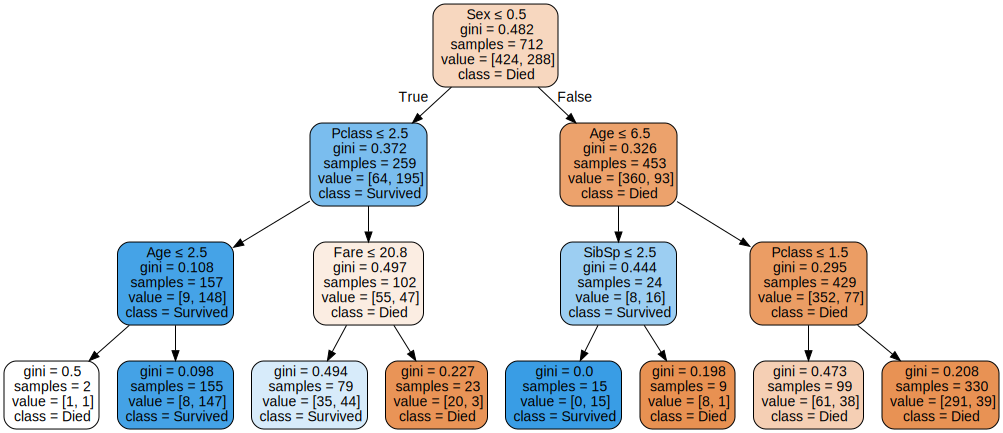

In [47]:
# Convert the data to numpy
y_train = df_train['Survived']
X_train = df_train[vars_list[1:]]

# Now fit the data with a decision tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Plot the tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=vars_list[1:], class_names=['Died', 'Survived'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [55]:
# Test the prediction
y_predict = clf.predict(X_train)

# Show score
score = accuracy_score(y_train, y_predict)
print('Accuracy:', score)

# Feature importance
print('Feature Importance:',[vars_list[1:][n] + ': ' + str(clf.feature_importances_[n]) for n in range(len(clf.feature_importances_))])

Accuracy: 0.824438202247191
Feature Importance: ['Pclass: 0.23882863836299498', 'Sex: 0.5980595516814325', 'Age: 0.0700954809225684', 'SibSp: 0.0537923660102661', 'Parch: 0.0', 'Fare: 0.039223963022737965', 'Embarked: 0.0']


In [56]:
# Predict the submission
df_test = pd.read_csv('test.csv')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [58]:
# Manicure the data
df_test[['Sex', 'Embarked']] = enc.fit_transform(df_test[['Sex', 'Embarked']])
imp = SimpleImputer()
df_test[['Age', 'Fare']] = imp.fit_transform(df_test[['Age', 'Fare']])
X_test = df_test[vars_list[1:]]

# Make predictions
y_test = clf.predict(X_test)

# Save predictions
df_submit = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':y_test})
df_submit.to_csv('tree_submission.csv', index=False)
